In [24]:
import time

from model import Model, Optimizer, WavenetData

from IPython.display import Audio
from IPython.core.debugger import Tracer
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from IPython import display
import torch
import numpy as np
#%matplotlib inline
%matplotlib notebook

In [34]:
model = Model(num_time_samples=10000, 
              num_blocks=2, 
              num_layers=10, 
              num_hidden=32, 
              num_classes=64)

model.load_state_dict(torch.load("trained_state_piano"))

start_tensor = data.get_minibatch([12345])[0].squeeze()
#start_tensor = torch.zeros((model.scope)) + 0.0

current scope:  1
current scope:  3
current scope:  7
current scope:  15
current scope:  31
current scope:  63
current scope:  127
current scope:  255
current scope:  511
current scope:  1023
current scope:  1024
current scope:  1026
current scope:  1030
current scope:  1038
current scope:  1054
current scope:  1086
current scope:  1150
current scope:  1278
current scope:  1534
current scope:  2046
scope:  3070


generate...
Generating took 15.082188844680786 seconds.


<IPython.core.display.Javascript object>


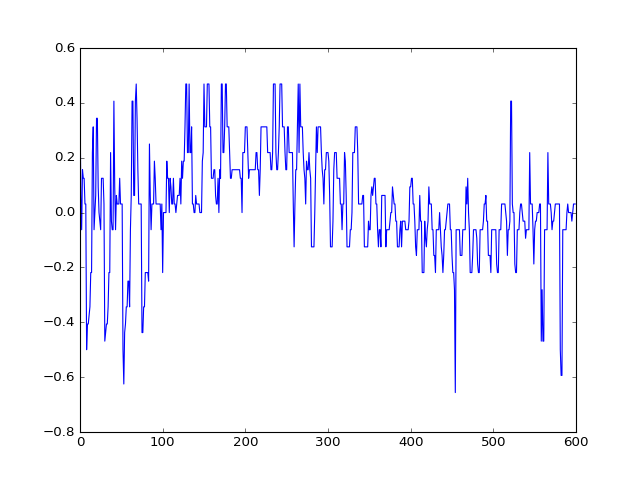

In [35]:
print('generate...')
tic = time.time()
generated = model.generate(start_data=start_tensor, num_generate=600)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

fig = plt.figure()
plt.plot(generated.data[-600:].numpy())

generate...
Generating took 17.014410972595215 seconds.


<IPython.core.display.Javascript object>


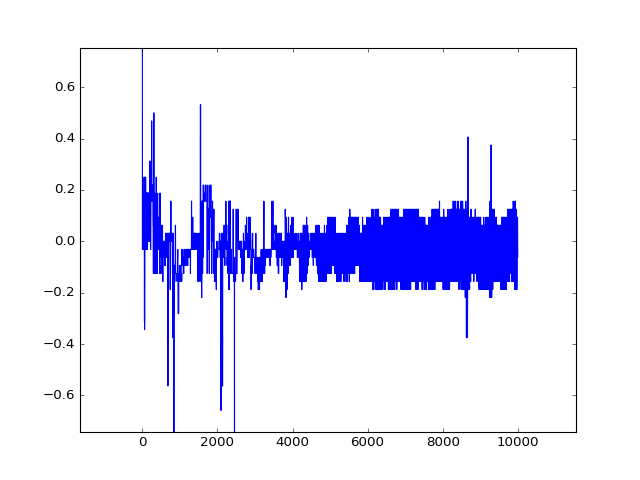

In [38]:
print('generate...')
tic = time.time()
[fast_generated, support_generated] = model.fast_generate(10000, first_samples=torch.zeros((1)))
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

fig = plt.figure()
plt.plot(fast_generated)